In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [5]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [7]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

In [8]:
train = train[train['품목'] == '깻잎']
test = test[test['품목'] == '깻잎']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1453, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1017, 118)"


In [9]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,784.7260,1710642.6278,1300.0431,0.6009,1.1763,0.1228,1.5290
lightgbm,Light Gradient Boosting Machine,810.0456,1869094.7293,1360.7494,0.5619,1.1878,0.1257,0.5360
gbr,Gradient Boosting Regressor,832.3694,1840133.0704,1348.1217,0.5743,1.1867,0.1334,1.2050
rf,Random Forest Regressor,842.6809,2012771.2483,1411.1444,0.5303,1.2000,0.1306,2.7380
llar,Lasso Least Angle Regression,942.2239,2205440.9806,1478.0979,0.4854,1.2044,0.1536,0.0300
br,Bayesian Ridge,952.4499,2279954.8840,1503.6129,0.4681,1.2087,0.1563,0.0210
lasso,Lasso Regression,982.1301,2361248.7125,1531.1411,0.4479,1.2074,0.1628,0.0370
ridge,Ridge Regression,988.7424,2374034.0625,1535.1678,0.4451,1.2067,0.1644,0.0180
lr,Linear Regression,1029.9167,2456996.1375,1562.6117,0.4248,1.2109,0.1753,0.4520
en,Elastic Net,1037.0953,2554697.6750,1591.5229,0.4069,1.2195,0.1727,0.0210


### Extra Trees Regressor

In [10]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,715.8652,1048493.2579,1023.9596,0.6737,0.1641,0.1267
1,860.5365,2129395.3071,1459.2448,0.5680,1.7029,0.1230
2,899.2396,2322430.6469,1523.9523,0.3768,1.5128,0.1513
3,727.1206,1600338.8828,1265.0450,0.7194,0.8581,0.1080
4,822.2998,1691856.2764,1300.7138,0.6001,1.2168,0.1314
5,630.0551,1355812.2186,1164.3935,0.6338,1.4806,0.0969
6,811.3381,1573665.5045,1254.4583,0.6341,1.1838,0.1302
7,768.9477,1566686.8481,1251.6736,0.6661,1.2109,0.1219
8,799.0972,2164926.2827,1471.3688,0.5355,1.2134,0.1150
9,812.7599,1652821.0526,1285.6209,0.6013,1.2194,0.1241


In [11]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,795.6742,1293554.2033,1137.3452,0.5974,0.1898,0.1438
1,974.6623,2616014.6251,1617.4099,0.4693,1.7205,0.1426
2,998.2687,2625910.5037,1620.4661,0.2953,1.5241,0.1702
3,967.6051,2391430.9396,1546.4252,0.5807,0.8914,0.1464
4,926.2437,1941475.9837,1393.3686,0.5411,1.2217,0.1528
5,774.7582,1775271.0321,1332.3930,0.5205,1.4976,0.1268
6,942.2392,2006772.4054,1416.6059,0.5334,1.2136,0.1507
7,826.6921,1691545.1350,1300.5941,0.6395,1.2224,0.1387
8,902.8727,2468629.4551,1571.1873,0.4703,1.2449,0.1342
9,855.0805,1793182.6648,1339.0977,0.5675,1.2170,0.1318


In [12]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


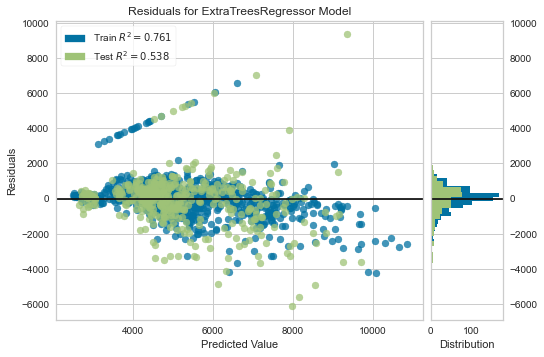

In [13]:
plot_model(tuned_model, plot = 'residuals')

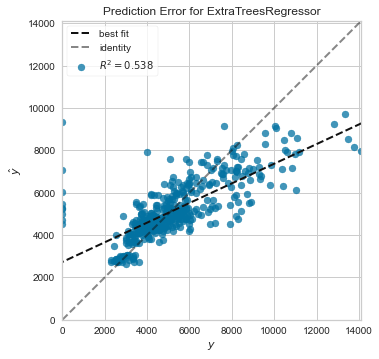

In [14]:
plot_model(tuned_model, plot = 'error')

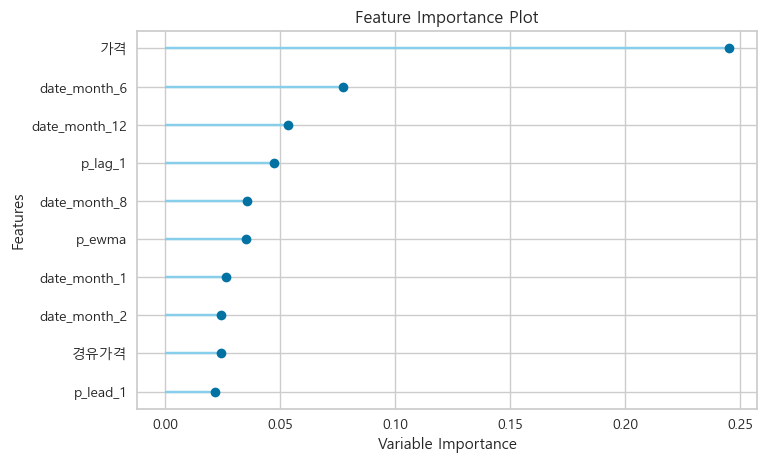

In [17]:
plot_model(tuned_model, plot = 'feature')

In [18]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,939.9362,2231533.4411,1493.8318,0.5380,1.2574,0.1465


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_9,date_weekday_0,date_weekday_1,date_weekday_2,date_weekday_5,date_weekday_6,date_is_month_end_1,date_is_month_start_0,1_week,Label
0,0.033125,-0.850053,-0.548705,0.749996,-1.424430,-1.135194,-1.501176,-0.958443,-0.288327,1.166764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5431.0,5980.707225
1,0.733551,-0.157644,1.346809,1.695930,1.048361,0.604514,1.318961,-0.679476,1.590605,-1.829940,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8808.0,7177.011080
2,-0.646090,-0.156320,-0.543278,-2.132411,1.138407,1.100547,1.217677,-0.121540,-0.288327,-0.578245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5960.0,4498.918298
3,-1.077690,0.850730,-0.563038,-2.182266,0.812857,0.374470,1.151209,-0.679476,0.419885,-1.910932,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2867.0,2990.641292
4,1.963241,-1.050209,-1.417161,-1.304555,-1.902364,-2.332143,-1.839846,3.040096,-0.288327,-0.497253,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10965.0,7844.048261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.501566,-0.256704,0.127570,0.648975,-0.125695,0.191154,-0.614938,0.296912,-0.288327,1.822063,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4148.0,4576.149121
432,1.865576,-1.050588,0.634904,-0.024069,-2.272937,-2.590943,-1.849341,2.947106,-0.288327,-1.005294,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8042.0,7792.428855
433,-1.465391,0.508291,0.750602,-0.670872,1.124554,1.240730,1.024604,-0.400508,-0.288327,0.158046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3471.0,3711.740353
434,-0.542013,0.841264,1.172032,0.053338,0.892513,0.834559,0.951805,0.017944,-0.216061,-0.504616,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2990.0,3788.859053


In [19]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [20]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
12103,2020-09-01,화요일,깻잎,4522.0,98038.5,경남,1147.20,139.93,25.966667,30.400000,...,1.333333,4.066667,3.200000,0.733333,0.733333,107969.1,0.0,86252.0,73611.6,5529.547654
12104,2020-09-02,수요일,깻잎,4586.0,96376.3,경남,1146.83,139.93,25.700000,28.100000,...,1.200000,1.766667,4.066667,3.200000,0.733333,66677.1,107969.1,0.0,86252.0,5575.792068
12105,2020-09-03,목요일,깻잎,4688.0,80208.7,경남,1146.39,139.93,26.300000,30.666667,...,1.133333,0.800000,1.766667,4.066667,3.200000,69005.8,66677.1,107969.1,0.0,5414.411754
12106,2020-09-04,금요일,깻잎,6192.0,73611.6,경남,1146.50,139.93,23.200000,30.233333,...,1.566667,0.533333,0.800000,1.766667,4.066667,76122.7,69005.8,66677.1,107969.1,6472.924129
12107,2020-09-05,토요일,깻잎,7675.0,86252.0,경남,1146.22,139.93,20.066667,22.266667,...,0.900000,1.500000,0.533333,0.800000,1.766667,77169.3,76122.7,69005.8,66677.1,6845.610960


In [21]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [22]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label']))/ pred_0['1_week']
score.mean()

0.3420671648252084

<AxesSubplot:xlabel='date', ylabel='1_week'>

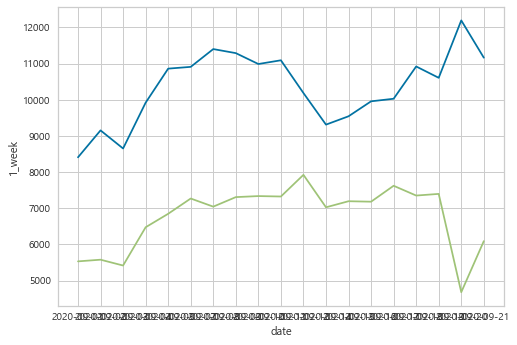

In [23]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)